In [4]:
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
fertility = fetch_ucirepo(id=244) 
  
# data (as pandas dataframes) 
X = fertility.data.features 
y = fertility.data.targets 
  
# metadata 
print(fertility.metadata) 
  
# variable information 
print(fertility.variables) 


{'uci_id': 244, 'name': 'Fertility', 'repository_url': 'https://archive.ics.uci.edu/dataset/244/fertility', 'data_url': 'https://archive.ics.uci.edu/static/public/244/data.csv', 'abstract': '100 volunteers provide a semen sample analyzed according to the WHO 2010 criteria. Sperm concentration are related to socio-demographic data, environmental factors, health status, and life habits', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 100, 'num_features': 9, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['diagnosis'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C5Z01Z', 'creators': ['David Gil', 'Jose Girela'], 'intro_paper': {'title': 'Predicting seminal quality with artificial intelligence methods', 'authors': 'David Gil, J. L. Girela, Joaquin De Juan, M. Jose G

In [5]:
if isinstance(fertility.data.targets, pd.DataFrame):
    y = fertility.data.targets.squeeze()
else:
    y = pd.Series(fertility.data.targets, name='target')

imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [6]:
clf = DecisionTreeClassifier(random_state=69)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [7]:
print("Features Head:")
print(X.head())  
print("Targets Head:")
print(y.head()) 

Features Head:
   season   age  child_diseases  accident  surgical_intervention  high_fevers  \
0   -0.33  0.69               0         1                      1            0   
1   -0.33  0.94               1         0                      1            0   
2   -0.33  0.50               1         0                      0            0   
3   -0.33  0.75               0         1                      1            0   
4   -0.33  0.67               1         1                      0            0   

   alcohol  smoking  hrs_sitting  
0      0.8        0         0.88  
1      0.8        1         0.31  
2      1.0       -1         0.50  
3      1.0       -1         0.38  
4      0.8       -1         0.50  
Targets Head:
0    N
1    O
2    N
3    N
4    O
Name: diagnosis, dtype: object


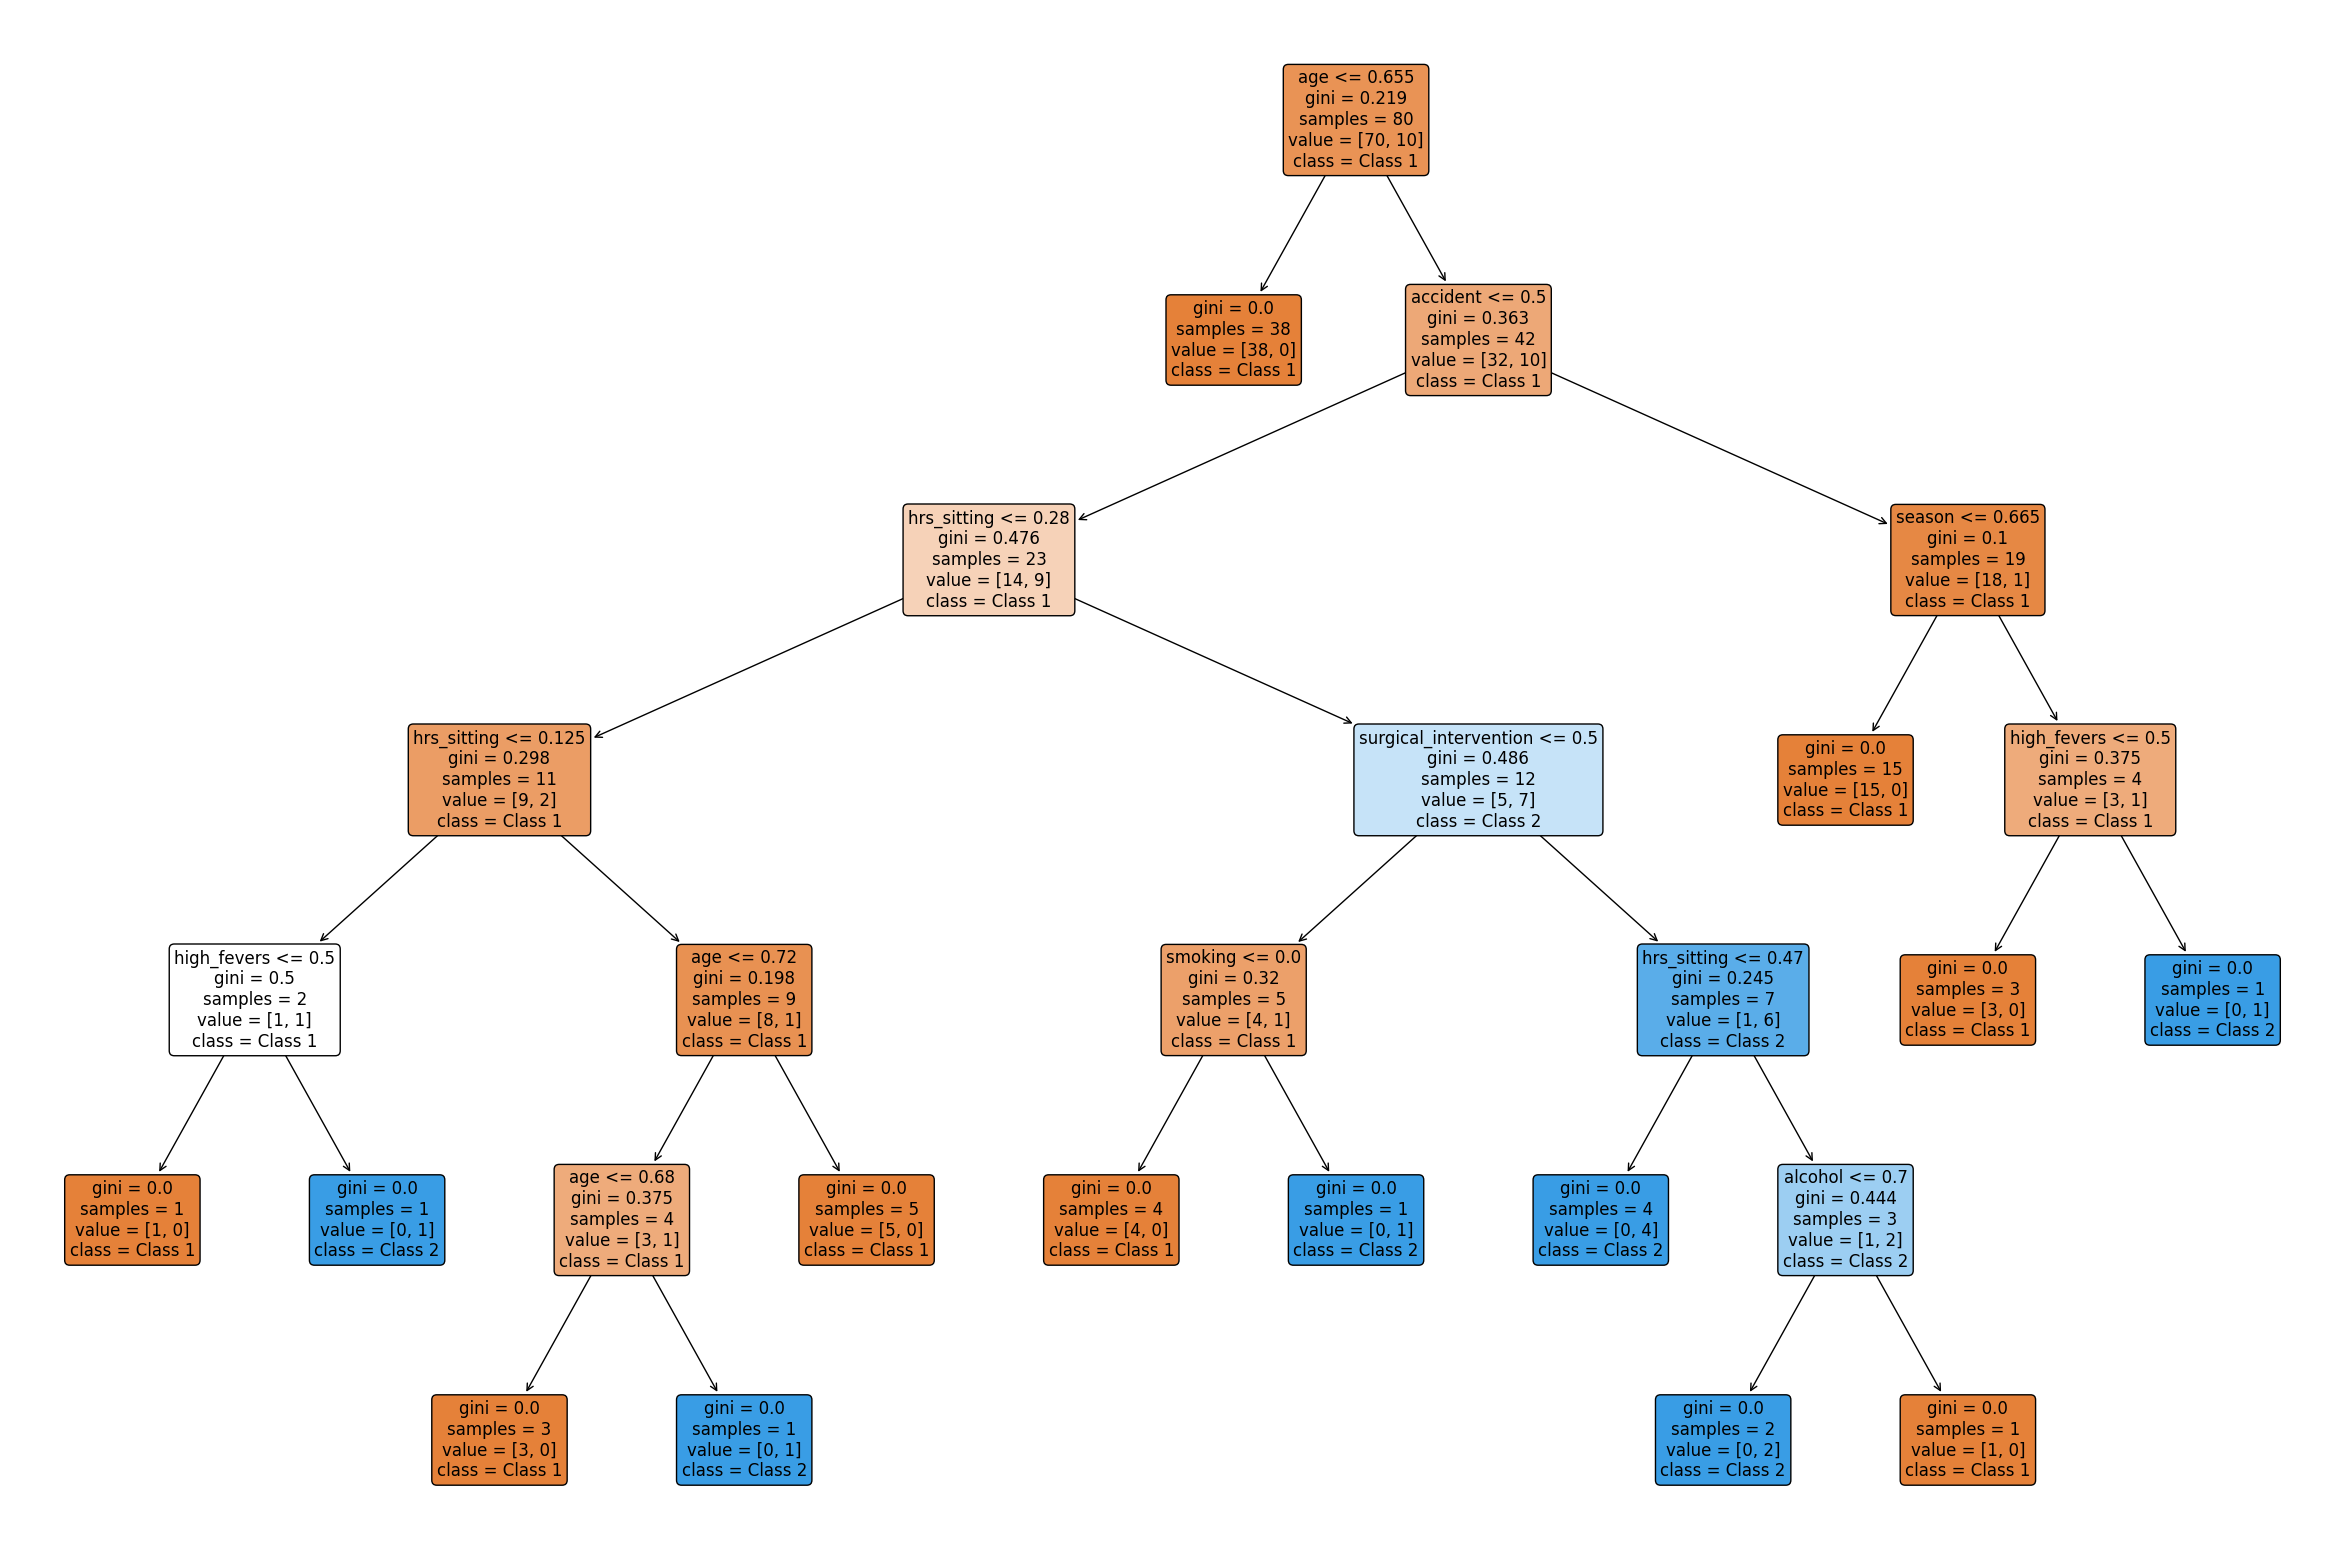

In [8]:
plt.figure(figsize=(30, 20)) 
plot_tree(clf, feature_names=X.columns, class_names=['Class 1', 'Class 2'], filled=True, rounded=True, fontsize=12)
plt.show()

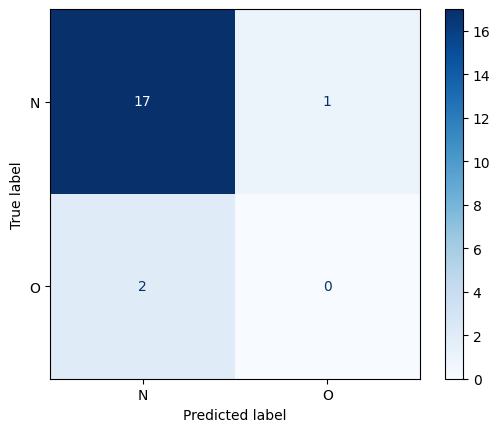

Confusion Matrix:
[[17  1]
 [ 2  0]]
True Positives: 17
False Positives: 1
False Negatives: 2
True Negatives: 0


In [9]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

print("Confusion Matrix:")
print(cm)

TP = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[1, 1]

print(f"True Positives: {TP}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Negatives: {TN}")

In [10]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           N       0.89      0.94      0.92        18
           O       0.00      0.00      0.00         2

    accuracy                           0.85        20
   macro avg       0.45      0.47      0.46        20
weighted avg       0.81      0.85      0.83        20

